This code does the following:

1. Creates a SQLite database called 'random_numbers.db' and a table 'random_data' to store random numbers.
2. Generates 100 random numbers between 0 and 1 and inserts them into the 'random_data' table.
3. Reconnects to the database and fetches the random numbers for analysis.
4. Calculates and prints the mean, median, and standard deviation of the generated random numbers using the statistics module.

In [1]:
import sqlite3
import random
import statistics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd  # Add this import for DataFrame conversion

# Create a SQLite database and connect to it
conn = sqlite3.connect('random_numbers.db')
cursor = conn.cursor()

# Create a table to store random numbers
cursor.execute('''
    CREATE TABLE IF NOT EXISTS random_data (
        id INTEGER PRIMARY KEY,
        value REAL
    )
''')

# Generate and insert random numbers into the database
for _ in range(100):
    random_value = random.uniform(0, 1)
    cursor.execute('INSERT INTO random_data (value) VALUES (?)', (random_value,))

# Commit the changes and close the database connection
conn.commit()
conn.close()

# Reconnect to the database for data analysis
conn = sqlite3.connect('random_numbers.db')
cursor = conn.cursor()

# Fetch the random numbers from the database
cursor.execute('SELECT value FROM random_data')
data = [row[0] for row in cursor.fetchall()]

# Perform data analysis and calculate statistics
mean_value = statistics.mean(data)
median_value = statistics.median(data)
std_deviation = statistics.stdev(data)

# Print the results
print(f"Mean Value: {mean_value}")
print(f"Median Value: {median_value}")
print(f"Standard Deviation: {std_deviation}")

# Close the database connection
conn.close()


Mean Value: 0.5001455347641267
Median Value: 0.5000853076986957
Standard Deviation: 0.28872003667117857


Here I added a box plot (whisker plot) and a scatter plot to visualize the data generated and analyzed in my code. I used the matplotlib library for creating these plots. 

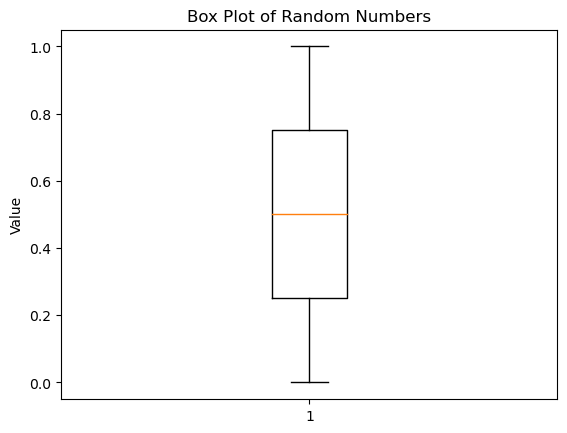

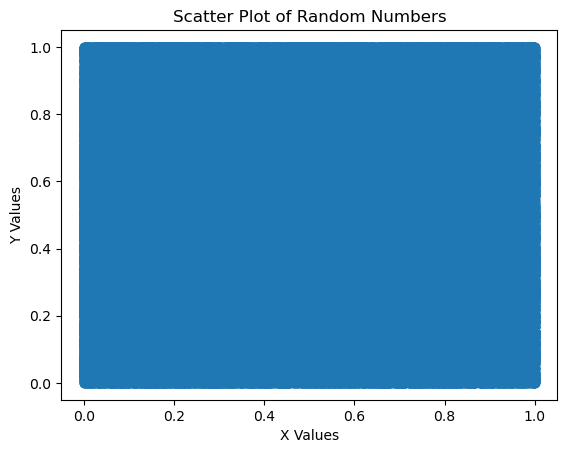

In [2]:

# Create a SQLite database and connect to it
conn = sqlite3.connect('random_numbers.db')
cursor = conn.cursor()

# ... (Same code as before to generate and fetch random data) ...

# Close the database connection
conn.close()

# Create a box plot (whisker plot)
plt.boxplot(data)
plt.title('Box Plot of Random Numbers')
plt.ylabel('Value')
plt.show()

# Create a scatter plot with random x values
x_values = [random.uniform(0, 1) for _ in range(len(data))]
plt.scatter(x_values, data)
plt.title('Scatter Plot of Random Numbers')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

# Additional analysis and visualization can be added as needed.


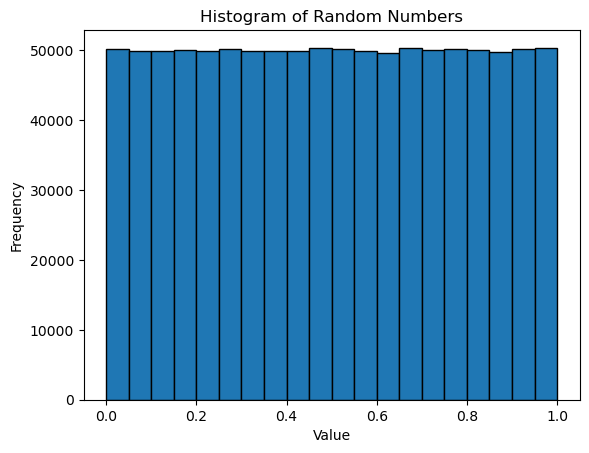

In [3]:
import sqlite3
import random
import statistics
import matplotlib.pyplot as plt

# Create a SQLite database and connect to it
conn = sqlite3.connect('random_numbers.db')
cursor = conn.cursor()

# ... (Same code as before to generate and fetch random data) ...

# Close the database connection
conn.close()

# Create a histogram
plt.hist(data, bins=20, edgecolor='k')
plt.title('Histogram of Random Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


